In [1]:
import tensorflow as tf

In [2]:
import keras
from keras.models import Sequential
from keras import datasets

In [3]:
import numpy as np

In [4]:
fashion_mnist=keras.datasets.fashion_mnist

In [5]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from 'C:\\Users\\Rohan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\datasets\\fashion_mnist.py'>

In [6]:
(X_train_pre,Y_train),(X_test_pre,Y_test)=fashion_mnist.load_data()

In [7]:
X_train_pre.shape

(60000, 28, 28)

In [8]:
#X_train_pre and X_test_pre are set with dimensions as (28,28)

In [9]:
from matplotlib import pyplot as plt

In [10]:
import cv2

In [11]:
model=Sequential()
resnet_layers=tf.keras.applications.ResNet50(
    include_top=False, #deletes the input and output layer
    weights="imagenet",
    input_tensor=None,
    input_shape=(32,32,3), 
    pooling='avg', #not required but preferred
    classes=10,#according to yoour need
  
)
for layer in resnet_layers.layers:
    layer.trainable=False

In [12]:
#minimum input size said to be 32x32

In [13]:
#input size (32,32,3)

In [14]:
from keras.layers import Flatten,Dense

In [15]:
model.add(resnet_layers)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax')) #10 classes in fashion_mnist

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
#0: T-shirt/top
# 1: Trouser
# 2: Pullover
# 3: Dress
# 4: Coat
# 5: Sandal
# 6: Shirt
# 7: Sneaker
# 8: Bag
# 9: Ankle boot

In [18]:
X_train_pre.shape

(60000, 28, 28)

In [19]:
def pre_process(data):
    new_data = np.zeros((data.shape[0],32,32,3)) #data.shape[0] is number of samples
    
    for i in range(data.shape[0]):
        arr=np.array(data[i])
        arr=cv2.cvtColor(arr,cv2.COLOR_GRAY2RGB)
        arr=cv2.resize(arr, dsize=(32,32))
        arr=arr/255
        
        new_data[i,:,:,:]=arr
    
    return new_data

In [20]:
#"pre" datasets passed into pre_process to get final dataset, done with all the adjustments
#any future changes to entire dataset can be done on the function "pre_process" itself

In [21]:
X_train = pre_process(X_train_pre)
X_test = pre_process(X_test_pre)

In [22]:
X_train[0].shape

(32, 32, 3)

In [23]:
X_train.shape

(60000, 32, 32, 3)

(32, 32, 3)


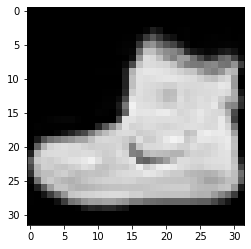

In [24]:
plt.imshow(np.array(X_train[0]))
print(X_train[0].shape)

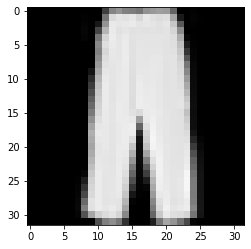

In [27]:
np.random.shuffle(X_train)
plt.imshow(X_train[0])

In [50]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


In [67]:
model.fit(
    X_test,
    Y_test,
    batch_size=32,
    validation_split = 0.2,
    epochs=10)

Epoch 1/10
250/250 [==============================] - 54s 216ms/step - loss: 0.7917 - accuracy: 0.6981 - val_loss: 0.8537 - val_accuracy: 0.6810
Epoch 2/10
250/250 [==============================] - 55s 220ms/step - loss: 0.7786 - accuracy: 0.7053 - val_loss: 0.7634 - val_accuracy: 0.7265
Epoch 3/10
250/250 [==============================] - 55s 219ms/step - loss: 0.7731 - accuracy: 0.7064 - val_loss: 0.7277 - val_accuracy: 0.7315
Epoch 4/10
250/250 [==============================] - 58s 231ms/step - loss: 0.7562 - accuracy: 0.7166 - val_loss: 0.7118 - val_accuracy: 0.7325
Epoch 5/10
250/250 [==============================] - 59s 238ms/step - loss: 0.7349 - accuracy: 0.7247 - val_loss: 0.7139 - val_accuracy: 0.7340
Epoch 6/10
250/250 [==============================] - 51s 204ms/step - loss: 0.7335 - accuracy: 0.7244 - val_loss: 0.7405 - val_accuracy: 0.7305
Epoch 7/10
250/250 [==============================] - 52s 210ms/step - loss: 0.7323 - accuracy: 0.7294 - val_loss: 0.6803 - val_ac

In [68]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 59s 189ms/step - loss: 0.6785 - accuracy: 0.7392


[0.6784504652023315, 0.7391999959945679]

In [70]:
class_names=[
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot"
]

In [76]:
predictions=model.predict(X_test)

313/313 [==============================] - 54s 172ms/step


model says this is:  Ankle boot


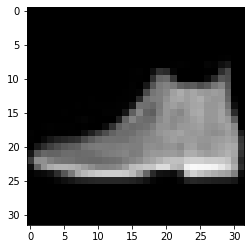

In [79]:
i=0
plt.imshow(X_test[i])
output=class_names[np.argmax(predictions[i])]
print("model says this is: " ,output)

model says this is:  Trouser


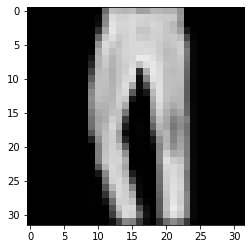

In [80]:
i=5
plt.imshow(X_test[i])
output=class_names[np.argmax(predictions[i])]
print("model says this is: " ,output)

model says this is:  Coat


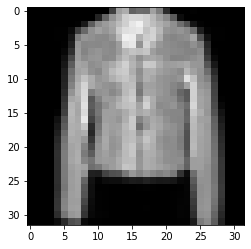

In [82]:
i=10
plt.imshow(X_test[i])
output=class_names[np.argmax(predictions[i])]
print("model says this is: " ,output)

model says this is:  Pullover


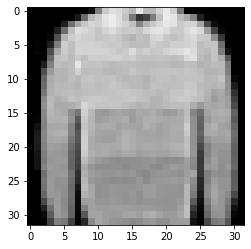

In [83]:
i=20
plt.imshow(X_test[i])
output=class_names[np.argmax(predictions[i])]
print("model says this is: " ,output)